Section 1: Project Start (Setup & Loading)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Downloads/housing_data.csv")


print(df.head())

print(df.info())

   Unnamed: 0 MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0           0       SC60       RL           65     8450   Pave   NaN      Reg   
1           1       SC20       RL           80     9600   Pave   NaN      Reg   
2           2       SC60       RL           68    11250   Pave   NaN      IR1   
3           3       SC70       RL           60     9550   Pave   NaN      IR1   
4           4       SC60       RL           84    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0     No    No          No       0    Feb   
1         Lvl    AllPub  ...        0     No    No          No       0    May   
2         Lvl    AllPub  ...        0     No    No          No       0    Sep   
3         Lvl    AllPub  ...        0     No    No          No       0    Feb   
4         Lvl    AllPub  ...        0     No    No          No       0    Dec   

  YrSold  SaleType  SaleCo

Section 2: Data Cleaning

In [4]:

print(df.isnull().sum().sort_values(ascending=False).head(10))

df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())

df['GarageCars'] = df['GarageCars'].fillna(0)

df['GarageArea'] = df['GarageArea'].fillna(0)

df['MasVnrArea'] = df['MasVnrArea'].fillna(0)

Alley           1369
MasVnrType       872
GarageYrBlt       81
Electrical         1
KitchenAbvGr       0
GarageType         0
FireplaceQu        0
Fireplaces         0
Functional         0
TotRmsAbvGrd       0
dtype: int64


Section 3: Feature Engineering

In [5]:

df['HouseAge'] = df['YrSold'] - df['YearBuilt']

df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

print(df[['HouseAge', 'TotalSF', 'SalePrice']].head())

   HouseAge  TotalSF  SalePrice
0         5     2566     208500
1        31     2524     181500
2         7     2706     223500
3        91     2473     140000
4         8     3343     250000


Section 4: Exploratory Data Analysis & Visuals

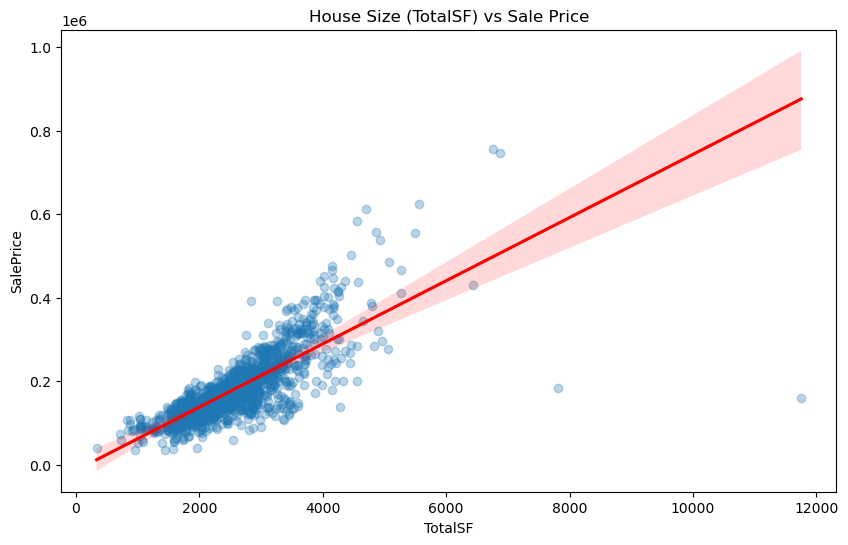

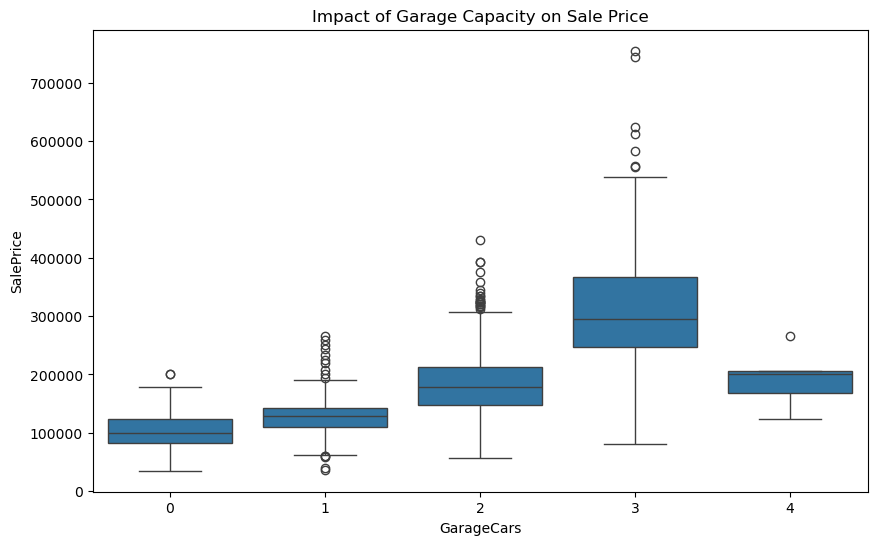

In [6]:
# 1. Size vs Price (Scatter Plot)
plt.figure(figsize=(10, 6))
sns.regplot(x='TotalSF', y='SalePrice', data=df, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('House Size (TotalSF) vs Sale Price')
plt.show()

# 2. Amenities Impact (Boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(x='GarageCars', y='SalePrice', data=df)
plt.title('Impact of Garage Capacity on Sale Price')
plt.show()


Section 5: Market Trends

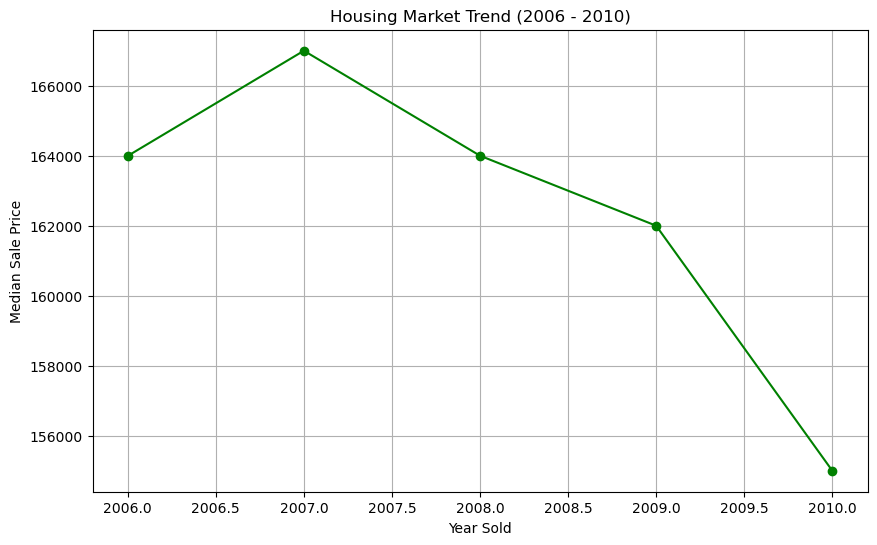

In [7]:
# Year-wise pricing trend
plt.figure(figsize=(10, 6))
df.groupby('YrSold')['SalePrice'].median().plot(kind='line', marker='o', color='green')
plt.title('Housing Market Trend (2006 - 2010)')
plt.ylabel('Median Sale Price')
plt.xlabel('Year Sold')
plt.grid(True)
plt.show()

Section 6: End (Conclusion & Insights)

At the end of the notebook, you should summarize your results:

 1. Main Insight: OverallQual (Quality) and TotalSF (Size) have the biggest impact on price.

2. Trend: Data shows that there fluctuations in the market after 2007 (Economic recession impact).

3. Amenities: Homes with a -3car garage are worth significantly more than homes with a 1-car garage.